In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

from google.colab import output
from time import sleep

In [ ]:
env = gym.make('Taxi-v3').env
env.s = 328

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

In [ ]:
epochs = 0
penalties, reward = 0, 0

frames = []

done = False

env.reset()

while not done:
  action = env.action_space.sample()
  state, reward, done, info = env.step(action)

  if reward == -10:
    penalties += 1

  frames.append({
      'frame': env.render(mode='ansi'),
      'state': state,
      'action': action,
      'reward': reward
  })

  epochs += 1

print(f'Epochs: {epochs}')
print(f'Penalties: {penalties}')

def _frames(frames):
  for i, frame in enumerate(frames):
    # clear_output(wait=True)
    output.clear(wait=True)
    print(frame['frame'])
    print(f'Timestep: {i + 1}')
    print(f'State: {frame["state"]}')
    print(f'Action: {frame["action"]}')
    print(f'Reward: {frame["reward"]}')

    sleep(.1)

# _frames(frames)

Epochs: 1064
Penalties: 337


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


In [ ]:
_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 1064
State: 85
Action: 5
Reward: 20


In [ ]:
env = gym.make('Taxi-v3').env

In [ ]:
g_table = np.zeros([env.observation_space.n, env.action_space.n])

In [ ]:
alpha = 0.1
gamma = 0.1
epsilon = 0.1

In [ ]:
env = gym.make('Taxi-v3').env

g_table = np.zeros([env.observation_space.n, env.action_space.n])

alpha = 0.1
gamma = 0.1
epsilon = 0.1

all_epochs = []
all_penalties = []

for i in range(1, 1000):
  state = env.reset()

  epochs, penalties, reward = 0, 0, 0
  done = False

  while not done:
    if random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()

    else:
      action = np.argmax(g_table[state])

    next_state, reward, done, info = env.step(action)

    old_value = g_table[state, action]
    next_max = np.max(g_table[next_state])

    new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)

    g_table[state, action] = new_value

    if reward == -10:
      penalties += 1

    state = next_state
    epochs += 1

    # if i % 100 == 0:
    #   output.clear(wait=True)

  all_epochs.append(epochs)
  all_penalties.append(penalties)

# print(f'Epochs: {epochs}')

print('Finish')

Finish


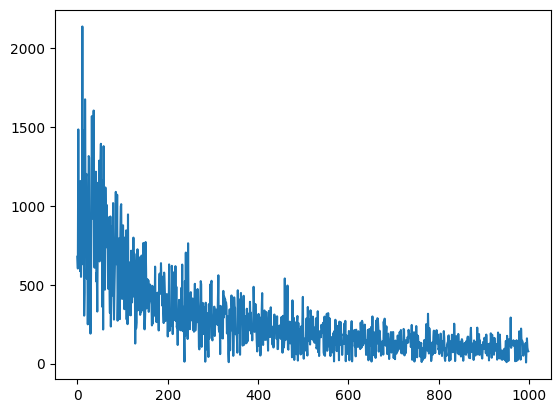

In [ ]:
plt.plot([i for i in range(len(all_epochs))], all_epochs)

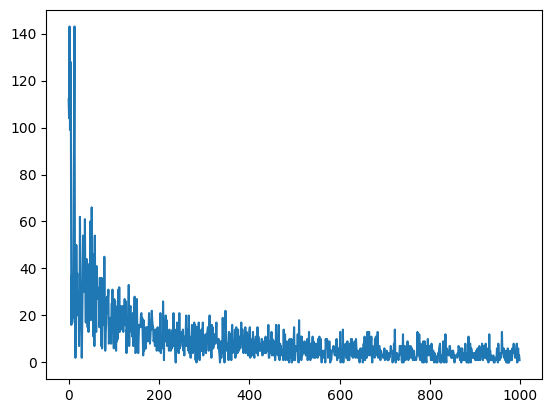

In [ ]:
plt.plot([i for i in range(len(all_penalties))], all_penalties)

In [ ]:
def study(alpha, gamma):
  env = gym.make('Taxi-v3').env

  g_table = np.zeros([env.observation_space.n, env.action_space.n])

  alpha = alpha
  gamma = gamma
  epsilon = 0.1

  all_epochs = []
  all_penalties = []

  for i in range(1, 1000):
    state = env.reset()

    epochs, penalties, reward = 0, 0, 0
    done = False

    while not done:
      if random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()

      else:
        action = np.argmax(g_table[state])

      next_state, reward, done, info = env.step(action)

      old_value = g_table[state, action]
      next_max = np.max(g_table[next_state])

      new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)

      g_table[state, action] = new_value

      if reward == -10:
        penalties += 1

      state = next_state
      epochs += 1

      # if i % 100 == 0:
      #   output.clear(wait=True)

    all_epochs.append(epochs)
    all_penalties.append(penalties)

  # print(f'Epochs: {epochs}')

  return all_epochs, all_penalties

In [ ]:
def study_plot(alpha, gamma):
  all_epochs, all_penalties = study(alpha, gamma)

  print(min(all_epochs))
  print(min(all_penalties))


  plt.plot([i for i in range(len(all_epochs))], all_epochs)
  plt.show()
  plt.plot([i for i in range(len(all_penalties))], all_penalties)
  plt.show()

6
0


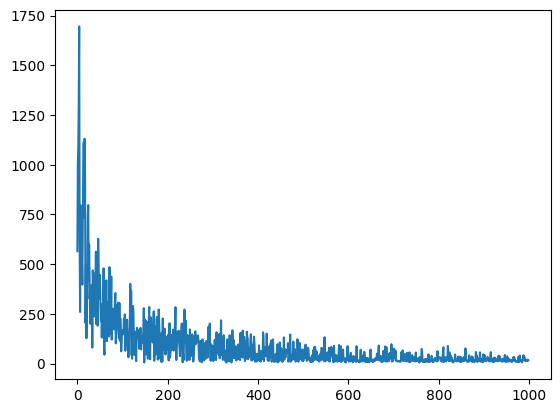

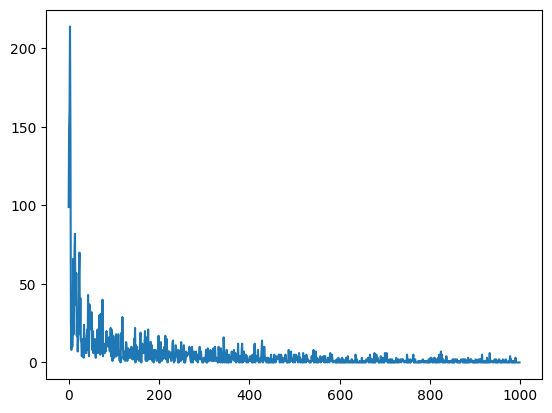

In [ ]:
study_plot(0.1, 1)

6
0


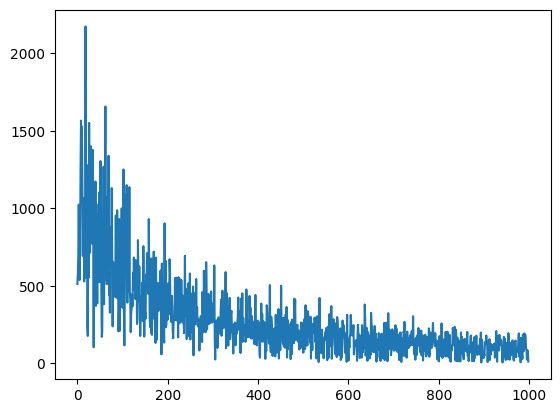

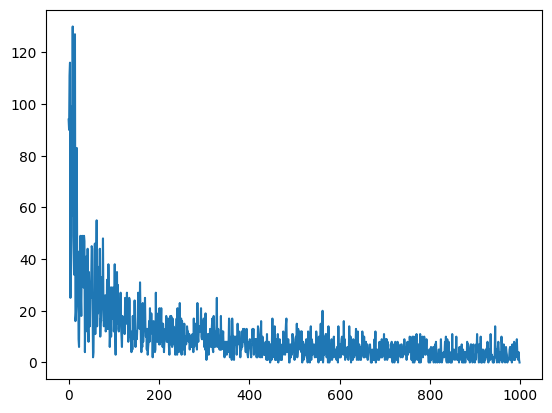

In [ ]:
study_plot(0.1, 0.1)